In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
dataset = pd.read_csv("dataset/Fraud.csv")

In [29]:
dataset.isnull().sum()

step               0
type               0
amount             0
nameOrig           0
oldbalanceOrg      0
newbalanceOrig     0
nameDest           0
oldbalanceDest     0
newbalanceDest     0
isFraud            0
isFlaggedFraud     0
amount_category    0
dtype: int64

In [4]:
dataset.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [5]:
dataset_texto = dataset[['type', 'nameOrig' , 'nameDest']]

In [6]:
dataset_numeros = dataset[
        ['step', 'amount' , 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']
    ]

In [7]:
dataset_texto.describe()

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


In [8]:
dataset_numeros.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,142.33,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


In [9]:
dataset_texto['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

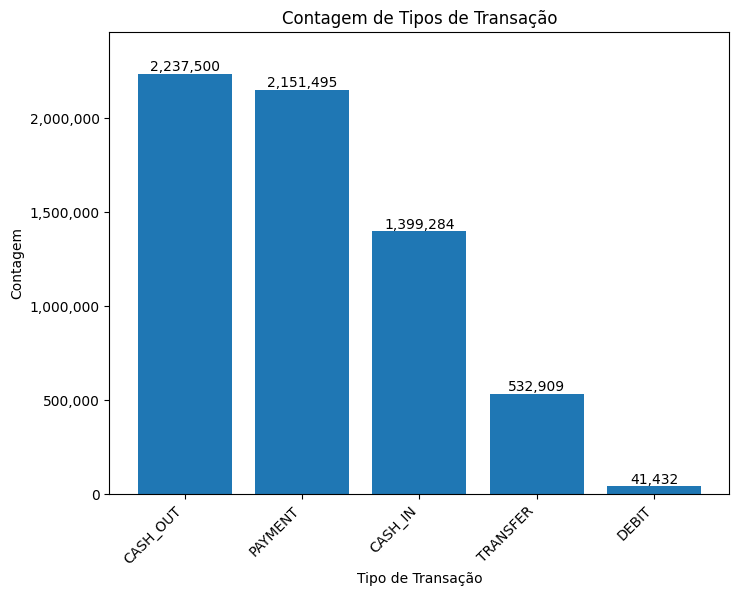

In [10]:
# Contagem das categorias 'type'
type_counts = dataset_texto['type'].value_counts()

# Plotar gráfico de barras
plt.figure(figsize=(8, 6))  # Definir tamanho da figura
bars = plt.bar(type_counts.index, type_counts.values)  # Plotar barras
plt.xlabel('Tipo de Transação')  # Definir rótulo do eixo x
plt.ylabel('Contagem')  # Definir rótulo do eixo y
plt.title('Contagem de Tipos de Transação')  # Definir título do gráfico

# Personalizar eixo x para evitar rotação dos rótulos
plt.xticks(rotation=45, ha='right')

# Adicionar rótulos nas barras com separador de milhar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:,.0f}', ha='center', va='bottom')

# Ajustar escala do eixo y
plt.ylim(0, type_counts.max() * 1.1)

# Adicionar separador de milhar no eixo y
plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Exibir o gráfico
plt.show()

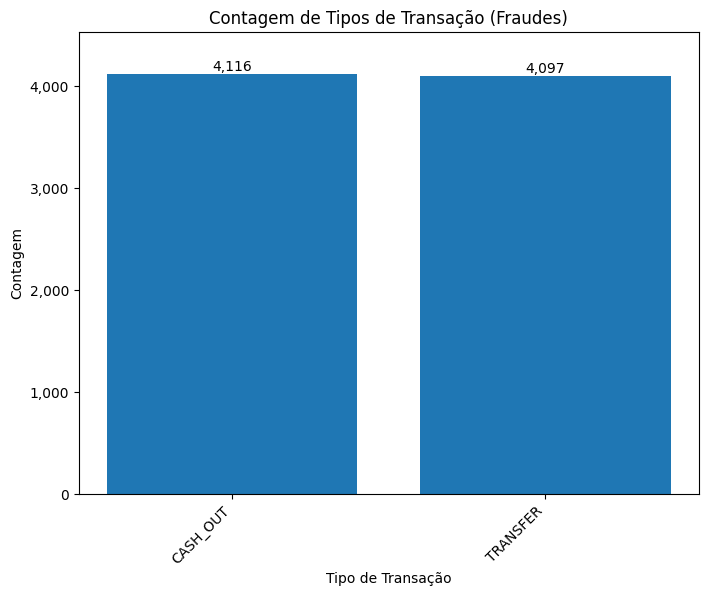

In [11]:
# Filtrar o dataset original com base na coluna 'isFraud'
dataset_frauds = dataset[dataset['isFraud'] == 1]

# Contagem das categorias 'type' no dataset filtrado
type_counts_frauds = dataset_frauds['type'].value_counts()

# Plotar gráfico de barras
plt.figure(figsize=(8, 6))  # Definir tamanho da figura
bars = plt.bar(type_counts_frauds.index, type_counts_frauds.values)  # Plotar barras
plt.xlabel('Tipo de Transação')  # Definir rótulo do eixo x
plt.ylabel('Contagem')  # Definir rótulo do eixo y
plt.title('Contagem de Tipos de Transação (Fraudes)')  # Definir título do gráfico

# Personalizar eixo x para evitar rotação dos rótulos
plt.xticks(rotation=45, ha='right')

# Adicionar rótulos nas barras com separador de milhar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:,.0f}', ha='center', va='bottom')

# Ajustar escala do eixo y
plt.ylim(0, type_counts_frauds.max() * 1.1)

# Adicionar separador de milhar no eixo y
plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Exibir o gráfico
plt.show()

<Figure size 600x600 with 0 Axes>

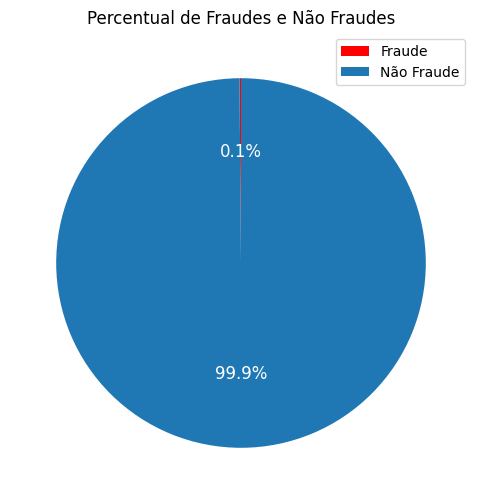

In [16]:
# Contagem das ocorrências de fraudes e não fraudes
fraud_count = dataset['isFraud'].value_counts()

# Criar uma lista com as contagens
count_list = [fraud_count[1], fraud_count[0]]
# Definir os rótulos para o gráfico
labels = ['Fraude', 'Não Fraude']

# Definir as cores das fatias
colors = ['#FF0000', '#1f77b4']  # Vermelho para fraude, azul para não fraude

# Plotar o gráfico de pizza
plt.figure(figsize=(6, 6))  # Definir tamanho da figura
plt.figure(figsize=(6, 6))  # Definir tamanho da figura
patches, _, text = plt.pie(count_list, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors,
                           textprops={'color': 'white', 'fontsize': 12})
# Adicionar título ao gráfico
plt.title('Percentual de Fraudes e Não Fraudes')
plt.legend()
plt.show()

In [14]:
dataset_numeros['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [18]:
# Mapear as categorias do tipo "type" para valores numéricos
type_mapping = {
    'CASH_OUT': 0,
    'PAYMENT': 1,
    'CASH_IN': 2,
    'TRANSFER': 3,
    'DEBIT': 4
}

# Criar a coluna "type_num" no dataset numérico
dataset_numeros['type_num'] = dataset['type'].map(type_mapping)

# Exibir o dataset com a nova coluna
dataset_numeros.head()


/tmp/ipykernel_80731/232249059.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_numeros['type_num'] = dataset['type'].map(type_mapping)


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_num
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,1
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,1
2,1,181.00,181.00,0.00,0.00,0.00,1,0,3
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,1


In [19]:
dataset_numeros['type_num'].value_counts()

0    2237500
1    2151495
2    1399284
3     532909
4      41432
Name: type_num, dtype: int64

In [40]:
dataset_numeros.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_num,amount_category
step,1.00,0.02,-0.01,-0.01,0.03,0.03,0.03,0.00,0.01,0.00
amount,0.02,1.00,-0.00,-0.01,0.29,0.46,0.08,0.01,0.20,0.52
oldbalanceOrg,-0.01,-0.00,1.00,1.00,0.07,0.04,0.01,0.00,0.26,0.05
newbalanceOrig,-0.01,-0.01,1.00,1.00,0.07,0.04,-0.01,0.00,0.27,0.05
oldbalanceDest,0.03,0.29,0.07,0.07,1.00,0.98,-0.01,-0.00,0.07,0.23
newbalanceDest,0.03,0.46,0.04,0.04,0.98,1.00,0.00,-0.00,0.08,0.29
isFraud,0.03,0.08,0.01,-0.01,-0.01,0.00,1.00,0.04,0.02,0.06
isFlaggedFraud,0.00,0.01,0.00,0.00,-0.00,-0.00,0.04,1.00,0.00,0.01
type_num,0.01,0.20,0.26,0.27,0.07,0.08,0.02,0.00,1.00,0.23
amount_category,0.00,0.52,0.05,0.05,0.23,0.29,0.06,0.01,0.23,1.00


In [21]:
dataset_numeros['amount'].describe()

count    6362620.00
mean      179861.90
std       603858.23
min            0.00
25%        13389.57
50%        74871.94
75%       208721.48
max     92445516.64
Name: amount, dtype: float64

In [27]:
# Definir as faixas de valores e os rótulos
faixas = [
    (0, 100000, 'Faixa 1'),
    (100000, 500000, 'Faixa 2'),
    (500000, 1000000, 'Faixa 3'),
    (1000000, 10000000, 'Faixa 4'),
    (10000000, float('inf'), 'Faixa 5')
]

# Função para atribuir a categoria com base no valor
def assign_category(amount):
    for i, faixa in enumerate(faixas):
        if faixa[0] <= amount < faixa[1]:
            return i
    return None

# Criar a coluna "amount_category" com as faixas de valores no dataset numérico
dataset_numeros['amount_category'] = dataset_numeros['amount'].apply(assign_category)

# Adicionar o nome da faixa ao dataset original e de texto
dataset['amount_category'] = dataset_numeros['amount_category'].apply(lambda x: faixas[x][2])
dataset_texto['amount_category'] = dataset_numeros['amount_category'].apply(lambda x: faixas[x][2])



/tmp/ipykernel_80731/2570033568.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_numeros['amount_category'] = dataset_numeros['amount'].apply(assign_category)
/tmp/ipykernel_80731/2570033568.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_texto['amount_category'] = dataset_numeros['amount_category'].apply(lambda x: faixas[x][2])


In [28]:
dataset['amount_category'].value_counts()

Faixa 1    3525256
Faixa 2    2497080
Faixa 3     209658
Faixa 4     124976
Faixa 5       5650
Name: amount_category, dtype: int64

In [30]:
dataset.groupby('amount_category')['amount'].sum()

amount_category
Faixa 1    95508516355.60
Faixa 2   575328919322.12
Faixa 3   139791983281.64
Faixa 4   253556603423.81
Faixa 5    80206922376.60
Name: amount, dtype: float64

In [33]:
# Filtrar o dataset original pelo valor de 'isFraud' igual a 1
dataset_fraude = dataset[dataset['isFraud'] == 1]

# Agrupar o dataset de fraudes pela coluna 'amount_category' e calcular a soma e contagem das transações
dataset_fraude.groupby('amount_category')['amount'].sum()



amount_category
Faixa 1     73020052.09
Faixa 2    681369887.63
Faixa 3    841303179.17
Faixa 4   7590722308.95
Faixa 5   2870000000.00
Name: amount, dtype: float64

In [34]:
dataset_fraude.groupby('amount_category')['amount'].count()


amount_category
Faixa 1    1707
Faixa 2    2642
Faixa 3    1158
Faixa 4    2419
Faixa 5     287
Name: amount, dtype: int64

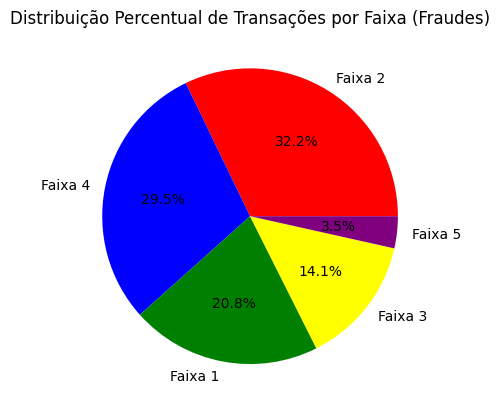

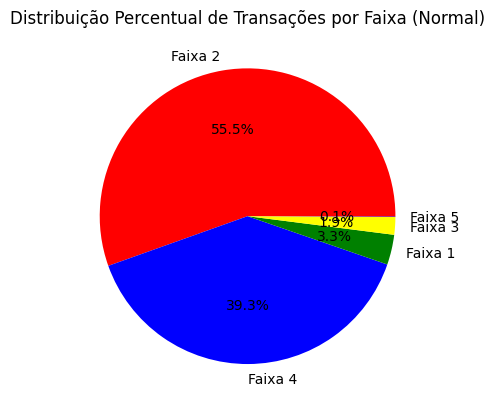

In [39]:
# Filtrar o dataset original para obter o dataset sem as fraudes
dataset_no_fraud = dataset[dataset['isFraud'] == 0]

# Obter a contagem de transações por faixa de transações para o dataset de fraudes
contagem_por_faixa_fraude = dataset_fraude['amount_category'].value_counts()

# Obter a contagem de transações por faixa de transações para o dataset normal sem as fraudes
contagem_por_faixa_normal = dataset_no_fraud['amount_category'].value_counts()

# Configurar os rótulos das faixas de transações
labels = contagem_por_faixa_fraude.index

# Configurar os valores para o dataset de fraudes e para o dataset normal sem as fraudes
fraude_values = contagem_por_faixa_fraude.values
normal_values = contagem_por_faixa_normal.values

# Criar a figura e os eixos do primeiro gráfico de pizza para o dataset de fraudes
fig1, ax1 = plt.subplots()
ax1.pie(fraude_values, labels=labels, autopct='%1.1f%%', colors=['red', 'blue', 'green', 'yellow', 'purple'])
ax1.set_title('Distribuição Percentual de Transações por Faixa (Fraudes)')

# Criar a figura e os eixos do segundo gráfico de pizza para o dataset normal sem as fraudes
fig2, ax2 = plt.subplots()
ax2.pie(normal_values, labels=labels, autopct='%1.1f%%', colors=['red', 'blue', 'green', 'yellow', 'purple'])
ax2.set_title('Distribuição Percentual de Transações por Faixa (Normal)')

# Exibir os gráficos de pizza
plt.show()


In [49]:
# Calcular a média do amount para as transações de fraude (isFraud = 1)
dataset[dataset['isFraud'] == 1].groupby('type')['amount'].mean()

type
CASH_OUT   1455102.59
TRANSFER   1480891.67
Name: amount, dtype: float64

In [50]:
# Calcular a média do amount para as transações não fraudulentas (isFraud = 0)
dataset[dataset['isFraud'] == 0].groupby('type')['amount'].mean()

type
CASH_IN    168920.24
CASH_OUT   173917.16
DEBIT        5483.67
PAYMENT     13057.60
TRANSFER   906229.01
Name: amount, dtype: float64